# Import Usefull Libraries

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# DataSet

The Auto-mpg dataset is a well-known automotive dataset available on Kaggle. It contains information about various cars from the late 1970s and early 1980s, including attributes such as miles per gallon (mpg), cylinders, displacement, horsepower, weight, acceleration, model year, and origin.

The purpose of this dataset is to predict the fuel efficiency (mpg) of a vehicle based on its other characteristics. It is often used as a benchmark dataset in regression tasks and machine learning algorithms.

the data is available here [Auot-mpg-dataset](https://www.kaggle.com/datasets/uciml/autompg-dataset)


# Load DataSet

In [78]:
df = pd.read_csv(r"D:\auto-mpg.csv")

## Data overview

In [79]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


### Identifying column type (Qualitative / Categorial)

<span style="color:blue">Qualitative:</span>
- mpg
- cylinders
- displacement
- horse power
- weight
- acceleration

<span style="color:blue">Categorial:</span>
- model year(not suitable for mathematical calcualtions)
- origin
- car name

<B>Notice that</B> origin column values: 1 is a car made in america, 2 in europe and 3 in other part of the world

# <span style="color:red;">part 1</span>: Exploratory Data Analysis (EDA)

## Data Cleaning
- remove null values
- change data type of horsepower column to numeric
- drop car name column (has nearly no effect on our analysis)

In [81]:
# # check for missing values in horsepower columns
missing_values = df[df["horsepower"] == '?']

missing_values

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [82]:
# # drop missing values
df = df[df["horsepower"] != '?']

# check for new shape
df.shape

(392, 9)

In [83]:
#convert horsepower to numeric
df["horsepower"] = pd.to_numeric(df["horsepower"])

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 30.6+ KB


In [85]:
# drop car name column
df.drop(columns="car name", inplace=True)

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


### Identifying Outliers

to deal with outliers, there are two options depend on the distribution of data:
- <span style="color:blue;">Normal Distribution</span>: outliers are the points which have values that fall more than three standard deviations from the mean
- <span style="color:blue;">Other Distribution</span>: the outlier data points are the ones falling below Q1–1.5 IQR or above Q3 + 1.5 IQR. The Q1 is the 25th percentile and Q3 is the 75th percentile of the dataset, and IQR represents the interquartile range calculated by Q3 minus Q1 (Q3–Q1)

<b>so</b> we need to know each feature distribution to select the appropriate method of finding the outliers through <b>visualization</b>

## Data Visualization

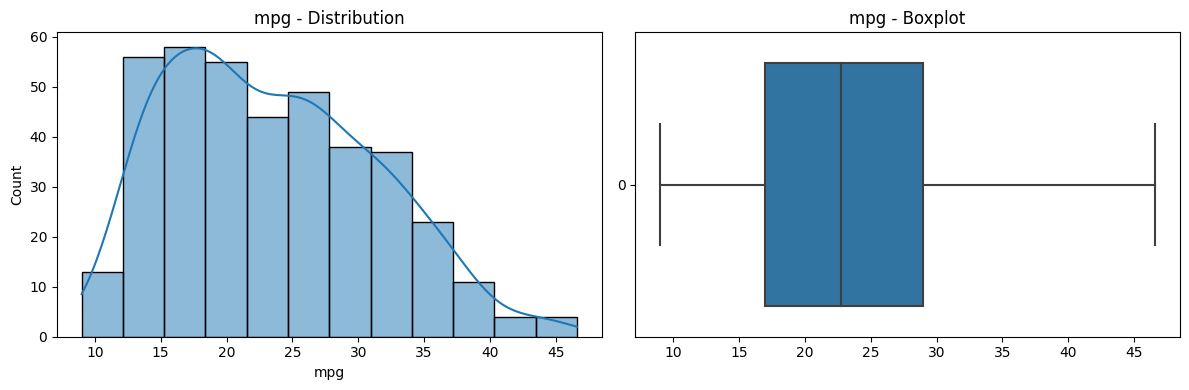

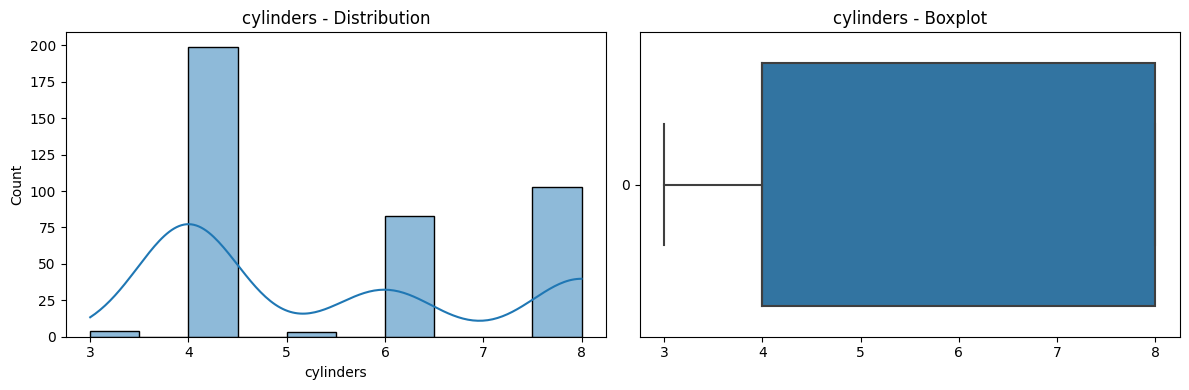

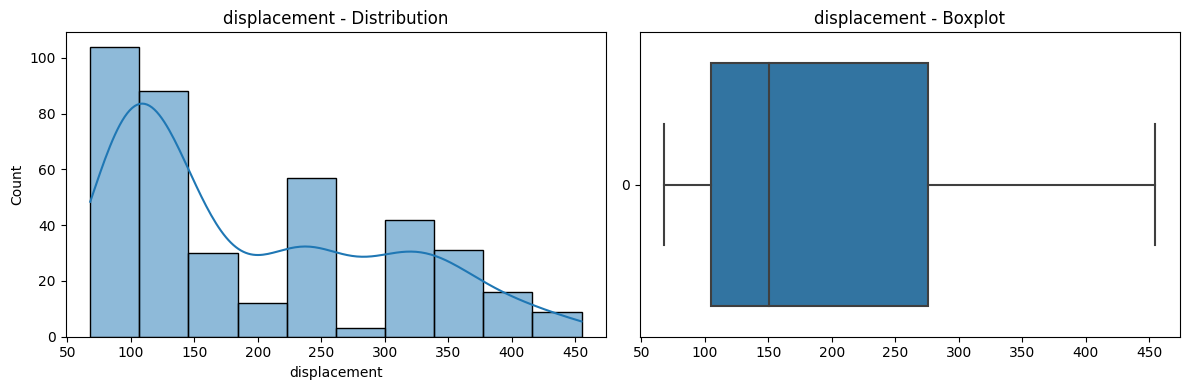

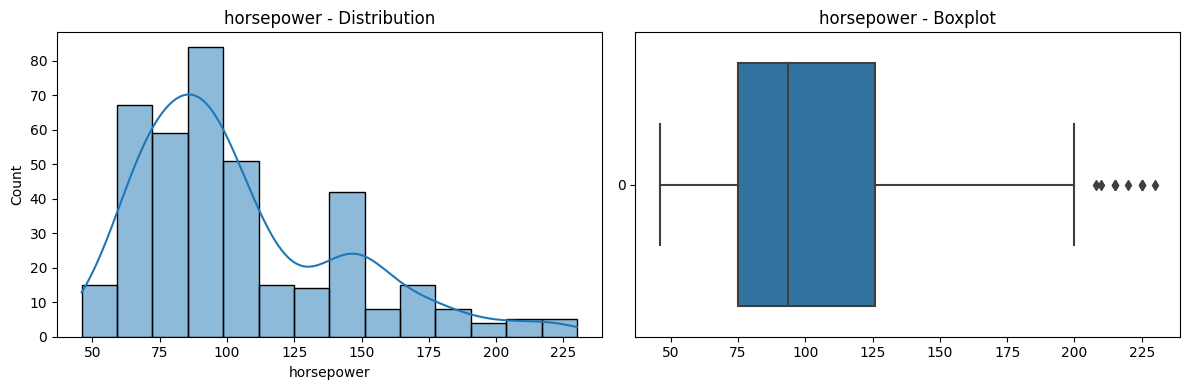

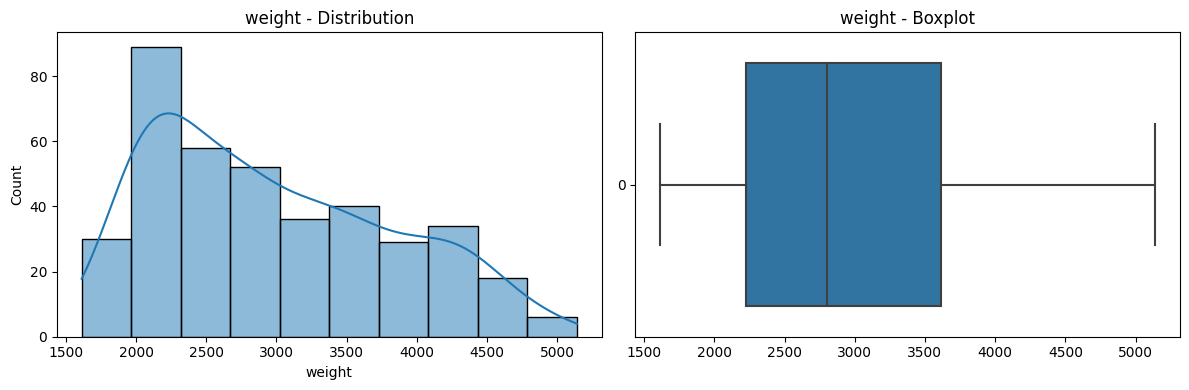

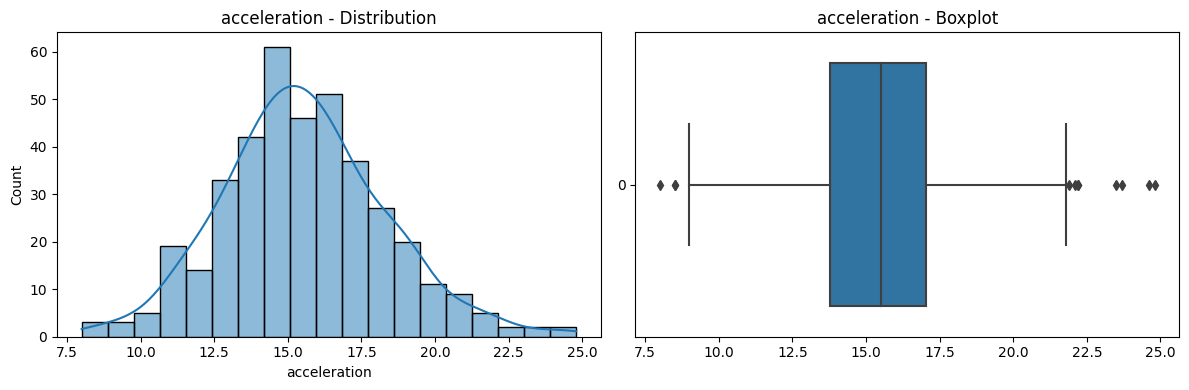

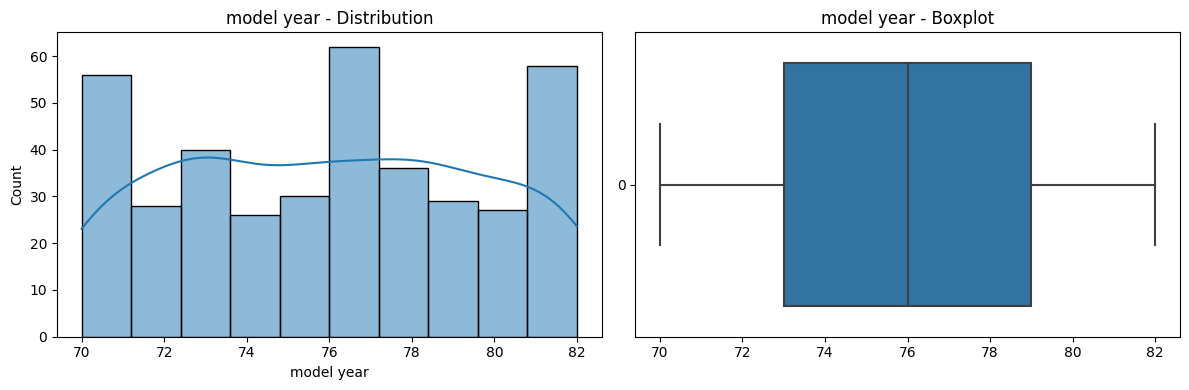

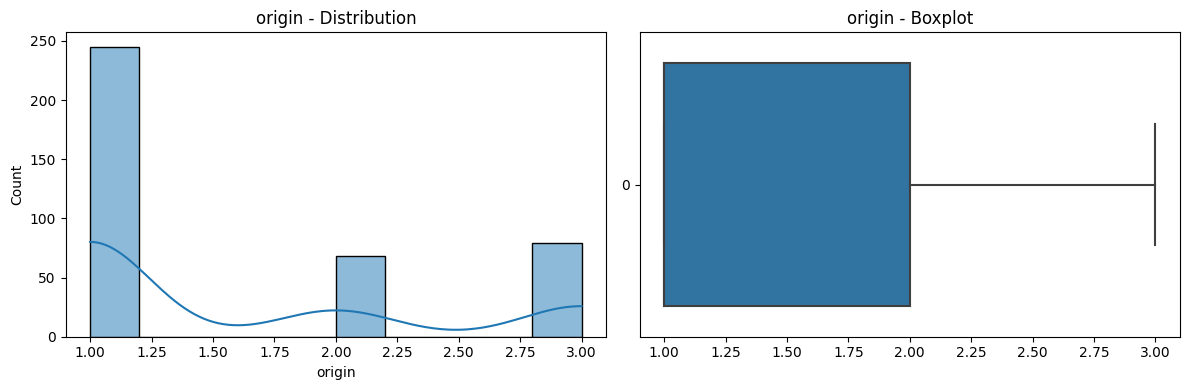

In [86]:
for column in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # Adjust the width (12) and height (4) as per your preference
    sns.histplot(data=df[column], kde=True, ax=axes[0])
    sns.boxplot(data=df[column], ax=axes[1], orient='h')
    axes[0].set_title(f'{column} - Distribution')
    axes[1].set_title(f'{column} - Boxplot')
    plt.tight_layout()
    plt.show()

## Types of Distribution:

Type of Distribution
- mpg: continuous the truncated normal distribution
- cylinders: discrete
- displacement: continuous double log normal distribution
- horsepower: continuous right-skewed distributions
- weight: continuous frequency distributions
- acceleration: continuous normal distribution
- model year: discrete
 - origin: discrete

The power of <B>boxplot</B> appears in showing us outliers without the need of any calcualtions, from the above graphs we can easily find that <span style="color:green;">acceleration</span> and <span style="color:green;">horsepower</span> are the only data including outliers

acceleration data follows normal distribution, so outliers will be data with values that fall more than three standard deviations from the mean

In [87]:
acceleration_mean = df["acceleration"].mean()
acceleration_std = df["acceleration"].std()

upper_range = acceleration_mean + 3 * acceleration_std
lower_range = acceleration_mean - 3 * acceleration_std

In [88]:
acceleration_outliers = df["acceleration"][(df["acceleration"] > (upper_range)) |
                                          (df["acceleration"] < (lower_range))]

acceleration_outliers

299    24.8
394    24.6
Name: acceleration, dtype: float64

In [89]:
# remove acceleration outliers
df["acceleration"] = df["acceleration"][(df["acceleration"] < (upper_range)) &
                                          (df["acceleration"] > (lower_range))]

horsepower data doesn't follow normal distribution, so the outlier data points are the ones falling below Q1–1.5 IQR or above Q3 + 1.5 IQR. The Q1 is the 25th percentile and Q3 is the 75th percentile of the dataset, and IQR represents the interquartile range calculated by Q3 minus Q1 (Q3–Q1)

In [90]:
df["horsepower"].describe()

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64

In [91]:
horse_power_q1 = df["horsepower"].quantile(0.25)
horse_power_q3 = df["horsepower"].quantile(0.75)
IQR = horse_power_q3 - horse_power_q1
upper_range = horse_power_q3 + 1.5 * IQR
lower_range = horse_power_q1 - 1.5 * IQR

In [92]:
horse_power_outlier = df["horsepower"][(df["horsepower"] > upper_range) |
                                   (df["horsepower"] < lower_range)] 

horse_power_outlier

6      220
7      215
8      225
13     225
25     215
27     210
67     208
94     215
95     225
116    230
Name: horsepower, dtype: int64

In [93]:
#remove horse power outliers
df["horsepower"] = df["horsepower"][(df["horsepower"] < upper_range) &
                                   (df["horsepower"] > lower_range)] 

In [94]:
# remove corresponding records for outliers in horsepower and acceleration
df.dropna(inplace=True)

## Descriptive statistics

In [95]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,23.659474,5.413158,188.856579,101.686842,2942.426316,15.619211,76.084211,1.589474
std,7.657241,1.678778,99.149436,34.122383,826.694251,2.592484,3.631911,0.812108
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.600000,4.000000,103.250000,75.000000,2220.000000,14.000000,73.000000,1.000000
50%,23.000000,4.000000,145.500000,92.000000,2764.500000,15.500000,76.000000,1.000000
75%,29.000000,6.000000,258.000000,120.000000,3542.000000,17.125000,79.000000,2.000000
max,46.600000,8.000000,429.000000,200.000000,5140.000000,23.700000,82.000000,3.000000


<span style="color:blue">measures of central tendency:</span>
- mean
- median (50%)

<span style="color:blue">measure of dispersion:</span>
- std

## Correlation Coefficient between 'mpg' (target) and other features

#### From Scratch

$\Huge r = \frac{{cov(xy)}}{\sqrt{Var(x) Var(y)}} = \frac{\frac{\Sigma(x_i - \bar X)(y_i - \bar Y)}{n-1}}{\sqrt\frac{\Sigma(y_i - \bar y)^2}{n-1}{\sqrt\frac{\Sigma(x_i - \bar X)^2}{n-1}}} $  

In [96]:
from math import sqrt
def corr_coefficient(target, predictor):
    '''
    compute correlation coefficient between target and one predictor
    input: target data, predictor data
    output: correlation coefficient
    
    '''
    x_bar = predictor.mean()
    y_bar = target.mean()
    n = len(target)
    sum_xy, sum_x, sum_y = 0., 0., 0.
    
    for x_i, y_i in zip(predictor, target):
        sum_xy += (x_i - x_bar) * (y_i - y_bar)
        sum_x += (x_i - x_bar) ** 2
        sum_y += (y_i - y_bar) ** 2
        
    cov_xy = sum_xy / (n - 1)
    var_x = sum_x / (n - 1)
    var_y = sum_y / (n - 1)
    
    correlation_coefficient = cov_xy / (sqrt(var_x * var_y))
    return correlation_coefficient.round(4)

target_column = df['mpg']
for predictor in df.columns:
    print(f'correlation coefficient between mpg and {predictor}: {corr_coefficient(target_column, df[predictor])}')

correlation coefficient between mpg and mpg: 1.0
correlation coefficient between mpg and cylinders: -0.7678
correlation coefficient between mpg and displacement: -0.8028
correlation coefficient between mpg and horsepower: -0.7881
correlation coefficient between mpg and weight: -0.8281
correlation coefficient between mpg and acceleration: 0.3797
correlation coefficient between mpg and model year: 0.5565
correlation coefficient between mpg and origin: 0.5589


#### using standard Python packages

In [97]:
df.corr().head(1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.0,-0.767828,-0.80282,-0.788064,-0.828134,0.379718,0.556453,0.558923


<b><i>scatter plot</i></b> is useful way to show correlation between two target and features of continous data 

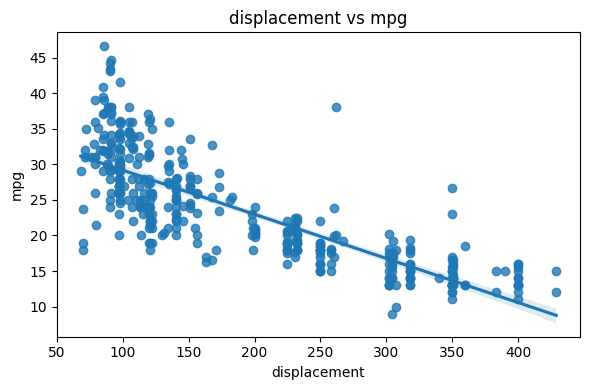

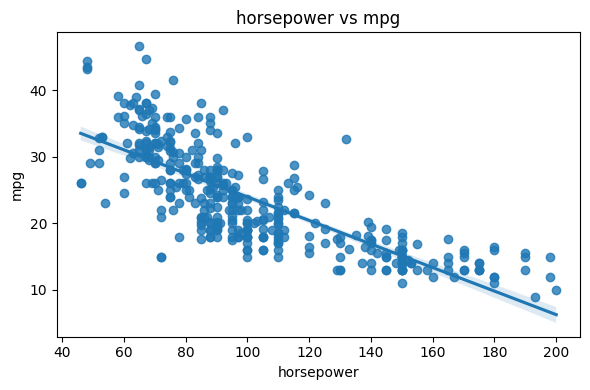

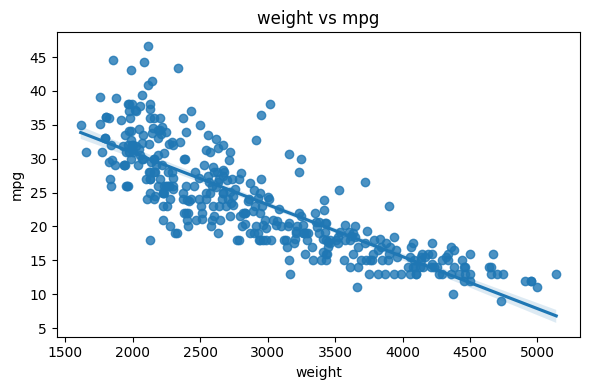

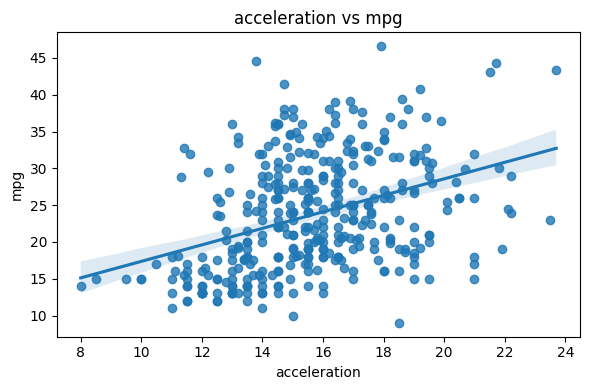

In [98]:
target_column = "mpg"  # Set the target column name

for column in df.columns:
    if column not in ['mpg', 'model year', 'origin', 'cylinders']:
        fig, axes = plt.subplots(1, 1, figsize=(6, 4))
        sns.regplot(data=df, x=column, y=target_column, ax=axes)
        axes.set_title(f'{column} vs {target_column}')
        plt.tight_layout()
        plt.show()


<b><i>bar plot</i></b> is useful way to show correlation between two target and features of discrete data 

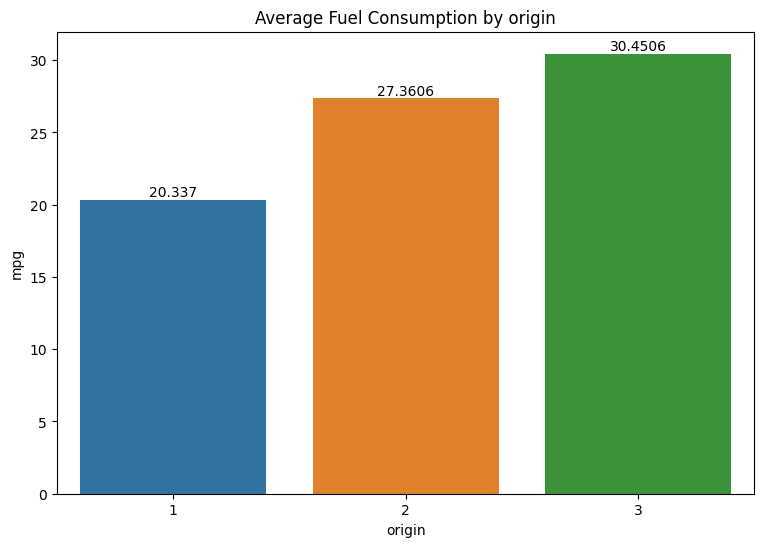

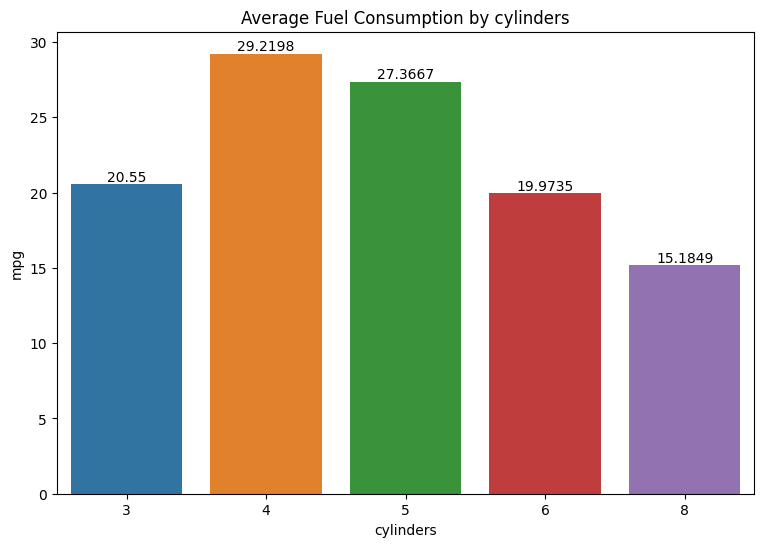

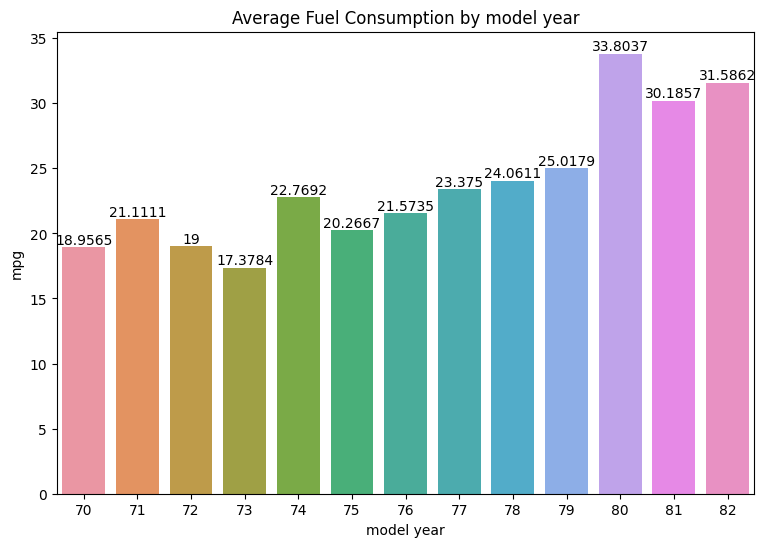

In [99]:
# Relationship of a dependent variable to categoric variables;

for i in ["origin", "cylinders", "model year"]:

    cat_mpg = df.groupby(i)["mpg"].mean()

    plt.figure(figsize = (9, 6))
    ax = sns.barplot(x = cat_mpg.index, y = cat_mpg)
    plt.title(f"Average Fuel Consumption by {i}")
    ax.bar_label(ax.containers[0])
    plt.show()

In [100]:
#remove horse power outliers
df["horsepower"] = df["horsepower"][(df["horsepower"] < upper_range*0.8) &
                                   (df["horsepower"] > lower_range*0.8)]

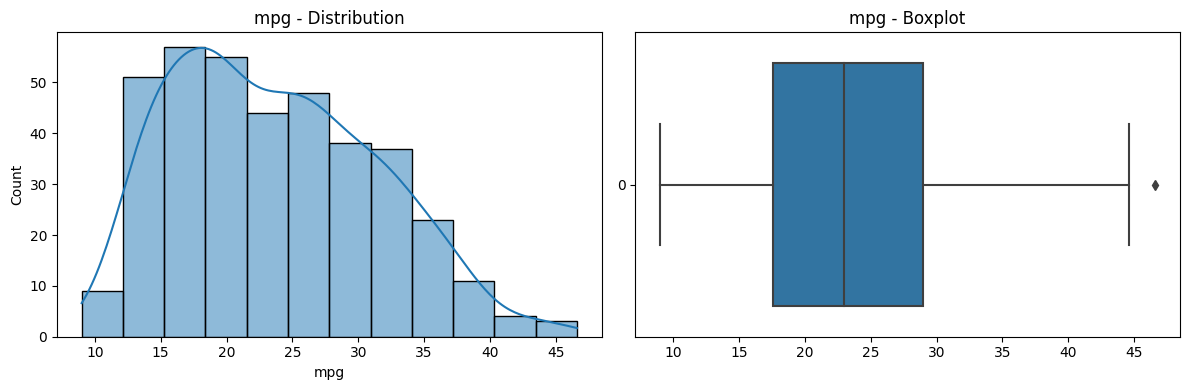

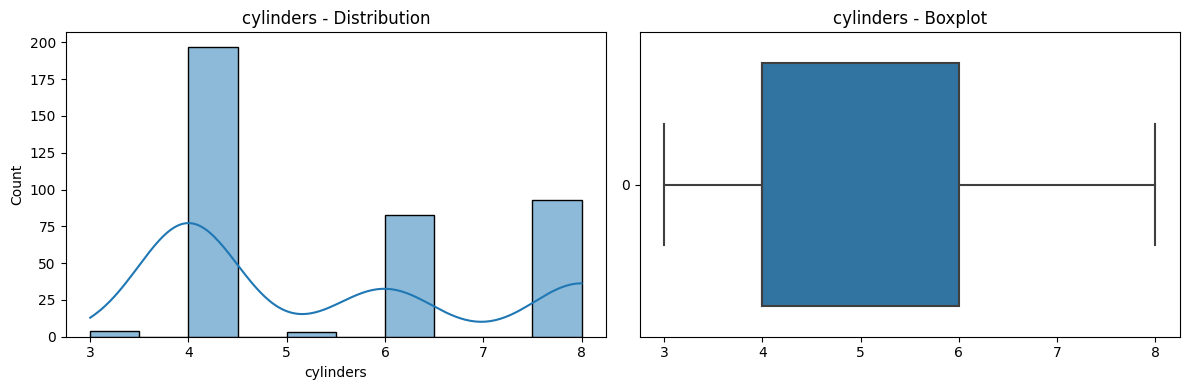

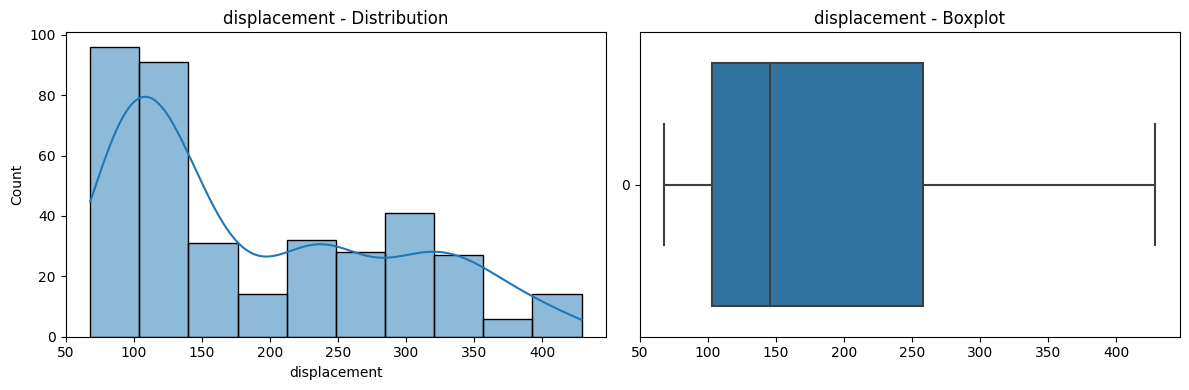

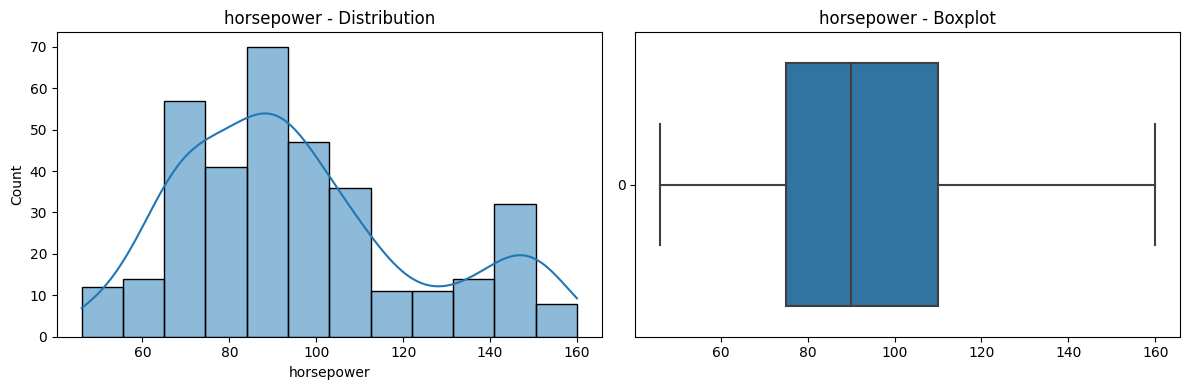

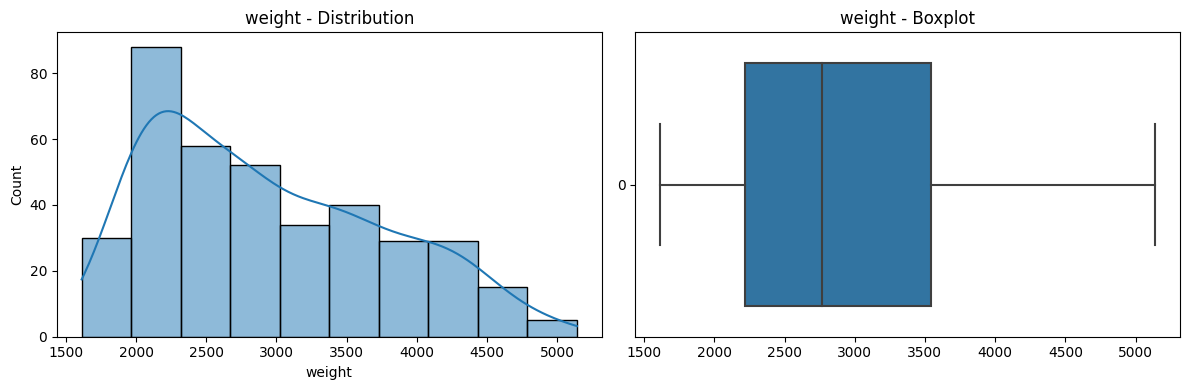

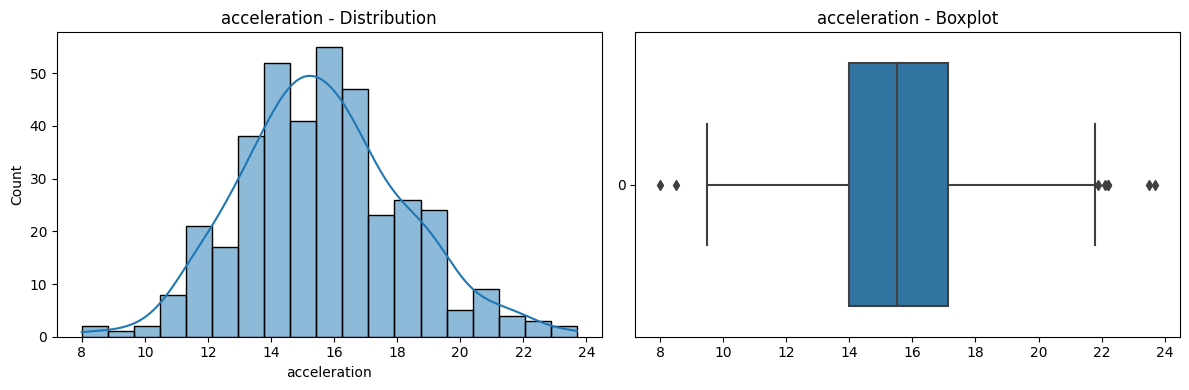

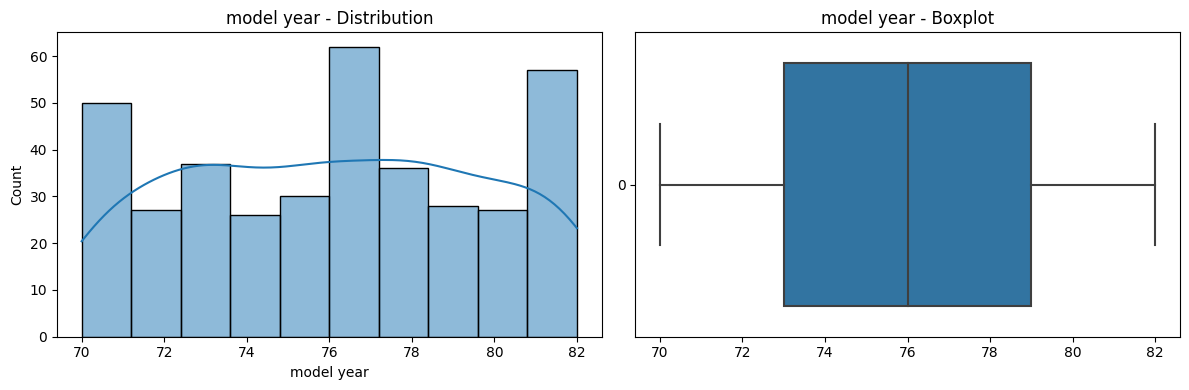

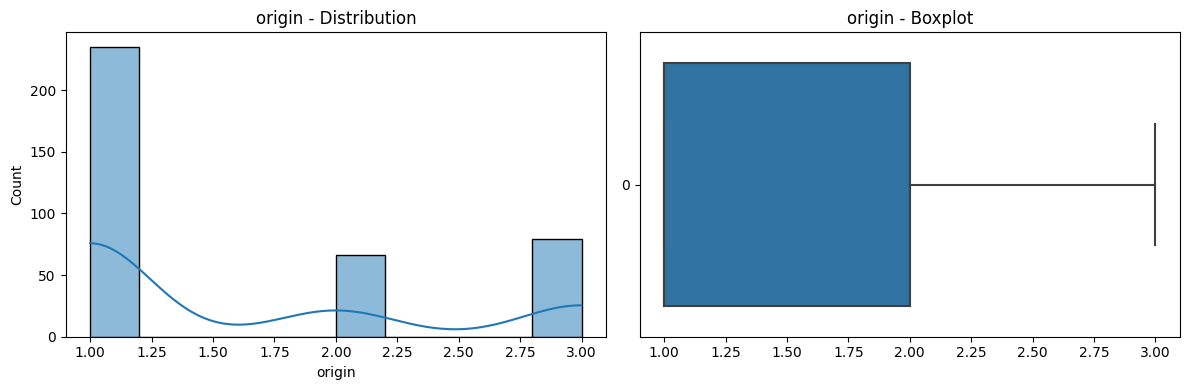

In [101]:
for column in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # Adjust the width (12) and height (4) as per your preference
    sns.histplot(data=df[column], kde=True, ax=axes[0])
    sns.boxplot(data=df[column], ax=axes[1], orient='h')
    axes[0].set_title(f'{column} - Distribution')
    axes[1].set_title(f'{column} - Boxplot')
    plt.tight_layout()
    plt.show()

## Features Standardization

range of values for each feature is different among different features, one way to solve this problem is to do <b>features standardization </b>

In [102]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,NaN,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


$\Huge z = \frac{{x - \mu}}{{\sigma}}$

In [103]:
#store target to avoid its standerdization
target = df["mpg"]

In [104]:
df = (df - df.mean()) / df.std()

# restore target values before standerdization
df["mpg"] = target

In [105]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,1.540908,1.191569,1.237992,0.679300,-1.396039,-1.675209,-0.725856
1,15.0,1.540908,1.625258,NaN,0.907922,-1.588905,-1.675209,-0.725856
2,18.0,1.540908,1.302513,1.962720,0.597045,-1.781770,-1.675209,-0.725856
3,16.0,1.540908,1.161312,1.962720,0.593416,-1.396039,-1.675209,-0.725856
4,17.0,1.540908,1.141140,1.600356,0.612770,-1.974635,-1.675209,-0.725856


In [106]:
df.mean().round(3)

mpg             23.659
cylinders        0.000
displacement    -0.000
horsepower      -0.000
weight          -0.000
acceleration    -0.000
model year       0.000
origin          -0.000
dtype: float64

In [107]:
df.std()

mpg             7.657241
cylinders       1.000000
displacement    1.000000
horsepower      1.000000
weight          1.000000
acceleration    1.000000
model year      1.000000
origin          1.000000
dtype: float64

In [108]:
df.describe().round(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,380.000,380.000,380.000,353.000,380.000,380.000,380.000,380.000
mean,23.659,0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000
std,7.657,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,9.000,-1.437,-1.219,-1.806,-1.608,-2.939,-1.675,-0.726
25%,17.600,-0.842,-0.863,-0.755,-0.874,-0.625,-0.849,-0.726
50%,23.000,-0.842,-0.437,-0.211,-0.215,-0.046,-0.023,-0.726
75%,29.000,0.350,0.697,0.513,0.725,0.581,0.803,0.506
max,46.600,1.541,2.422,2.325,2.658,3.117,1.629,1.737


## Now, data is ready for prediction

# <span style="color:red;">part 2</span>: Inference

## linear regression coefficients response against each predictor individually

$\Huge \hat Y  = m \times X + b $

### from scratch

- $\Huge m = \frac{{cov(xy)}}{{Var(x)}} = \frac{\frac{\Sigma(x_i - \bar X)(y_i - \bar Y)}{n-1}}{\frac{\Sigma(x_i - \bar X)^2}{n-1}} $  
- $\Huge b = \bar Y- m \times \bar X $
- ## where 
  $\Huge\bar X =\frac{\Sigma x_i}{n}$
  $\Huge\bar Y =\frac{\Sigma y_i}{n}$


In [109]:
def linear_regression_coefficients(target, predictor):
    
    '''
    function calculate linear regression coefficient between target and predictor
    input: target data, predictor data
    output: linear regression coefficient
    
    '''
    x_bar = predictor.mean()
    y_bar = target.mean()    
    n = len(target)
    sum_xy, sum_x = 0., 0.
    for x_i, y_i in zip(predictor, target):
        sum_xy += (x_i - x_bar) * (y_i - y_bar)
        sum_x += (x_i - x_bar) ** 2
    cov_xy = sum_xy / (n - 1)
    var_x = sum_x / (n-1)
    m = cov_xy / var_x
    b = y_bar - m * x_bar
    return m, b

target_column = df['mpg']
for predictor in df.columns[1:]:
    print(f'linear regression coefficients between mpg and {predictor}:\
    {linear_regression_coefficients(target_column, df[predictor])}')

linear regression coefficients between mpg and cylinders:    (-5.8794447057326344, 23.65947368421053)
linear regression coefficients between mpg and displacement:    (-6.147386636511645, 23.65947368421053)
linear regression coefficients between mpg and horsepower:    (nan, nan)
linear regression coefficients between mpg and weight:    (-6.341219487034064, 23.65947368421053)
linear regression coefficients between mpg and acceleration:    (2.9075885907881083, 23.65947368421053)
linear regression coefficients between mpg and model year:    (4.260894237170843, 23.659473684210525)
linear regression coefficients between mpg and origin:    (4.2798088248520365, 23.65947368421053)


### using python package

In [111]:
import numpy as np
import pandas as pd 
from sklearn.linear_model import LinearRegression

def linear_regression_coeff_2cols_sklearn(col1, col2):
    X = col1.values.reshape(-1, 1)  # values converts it into a numpy array
    Y = col2.values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(X, Y)  # perform linear regression
    Y_pred = linear_regressor.predict(X)  # make predictions
    m,b= linear_regressor.coef_[0][0] , linear_regressor.intercept_[0]
    return m,b
def linear_regression_coeff_sklearn(col):  #calculate the linear regression coefficients between specific column and other columns
    linear_regression_coff_dict = {k : linear_regression_coeff_2cols_sklearn(df[k],col) for k in df.columns[1:]}
    return linear_regression_coff_dict
linear_regression_coeff_sklearn(df["mpg"])

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

## Multivariable Linear Regression analysis

$\Huge \hat Yi  = m \times Xi + b $

###  <b>mpg</b> = m1 * cylinders + m2 * displacement + m3 * horsepower + m4 * weight + m5 * acceleration + m6 * model year + m7 * origin + b

#### mpg : is the <b>dependent variable </b>

#### X1 ~ X7 : the <b> independent variables</b>

####  m1 ~ m7 : are <b>the  regression  coefficients</b> 

####  b : is the <b>intercept </b>




In [112]:
independent_vars = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']
dependent_var = 'mpg'
test_size = 0.2
random_state = 42

# Split the data into dependent and independent variables
X = df[independent_vars]
y = df[dependent_var]

# Standardize the independent variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the standardized data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=test_size, random_state=random_state)

multireg = LinearRegression()
multireg.fit(X_train, y_train)  # Fit the linear regression model

y_pred = multireg.predict(X_test)  # Make predictions on the testing set

r2 = r2_score(y_test, y_pred)  # Calculate R-squared
mse = mean_squared_error(y_test, y_pred)  # Calculate mean squared error

print("R-squared:", r2)
print("Mean Squared Error:", mse)

coefficients = pd.DataFrame({'Variable': independent_vars, 'Coefficient': multireg.coef_})
coefficients  # Print the coefficients

# intercept = multireg.intercept_  # Calculate the intercept
# print("Intercept:", intercept)


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values